<a href="https://colab.research.google.com/github/AJ-21cm/AJ-21cm/blob/main/EE_CTRW_SP_Real_Planar_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx

In [ ]:
!pip3 install numpy==1.23.0

In [ ]:
import osmnx as ox

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.9 MB/s eta 0:00:00


In [ ]:
pip install matplotlib==3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 5.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from scipy.optimize import curve_fit
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
import math as m
import igraph as ig
import pickle
from collections import OrderedDict


#Defining function for plotting work

In [ ]:
def bar_plot_contructing(array):
  new_arr=[]
  x=[]
  unique_val=np.unique(array)
  for i in unique_val:
        x.append(str(int(i)))
        new_arr.append(np.count_nonzero(array==i))
  plt.bar(x,new_arr,width=0.4)
def scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=5,opacity=0.6,marker="o"):
  plt.scatter(xarr,yarr,s=dotsize, c=None, marker=None, cmap=None, norm=None,
  vmin=None, vmax=None, alpha=opacity, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
  #plt.plot(xarr,yarr,label=labels,ls=":")
  plt.grid()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend()
def HistoGram(array,bins,normalized,width,xlabel,ylabel,alingm,title,fsize):
  fig=plt.figure(figsize=fsize)
  plt.hist(array, bins=bins, range=None, density=normalized, weights=None, cumulative=False,
  bottom=None, histtype='bar', align=alingm, orientation='vertical', rwidth=width,
  log=False, color=None, label=None, stacked=False)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
def XY_plotting(x,y,xlabel,ylabel,title,ls):
  plt.plot(x,y,ls=ls)
  plt.grid()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

#Defining function for curve fitting

In [ ]:
def objective(x, a, b,c):
	return (a * x**b) + c
def curve_fitting(xx,yy):
  x=xx
  y=yy
  # curve fit
  popt, _ = curve_fit(objective, x, y)
  # summarize the parameter values
  a, b, c= popt
  # plot input vs output
  plt.scatter(x, y)
  # define a sequence of inputs between the smallest and largest known inputs
  #x_line = arange(min(x), max(x), 1)
  # calculate the output for the range
  a,b,c=np.round(a),np.round(b),np.round(c)
  y_line = objective(x, a, b,c)
  print("scaling=",a,"exponent=",b,"shifting=",c)
  # create a line plot for the mapping function
  label=r'$ax^b +c$'+'a= '+str(a)+'b='+str(b)+'c='+str(c)
  plt.plot(x, y_line, '--', color='red')
  plt.show()

##Curve fitting using sklearn library

In [ ]:
def LinearR_sklearn(xarr,yarr):
  regr = LinearRegression()
  x=xarr.reshape(-1, 1)
  y=yarr.reshape(-1,1)
  regr.fit(x, y)
  y_pred = regr.predict(x)
  slope=np.round(regr.coef_[0,0],1)
  intercepts=np.round(regr.intercept_[0],1)
  #R_2=r2(y,y_pred)
  RMSE=m.sqrt(mse(y,y_pred))
  return y_pred,slope,intercepts#,R_2,RMSE

#Defining function for writing and reading data from a binary file

In [ ]:
def storeData(db,file_name):
    # Its important to use binary mode
    dbfile = open(file_name, 'wb')
    # source, destination
    pickle.dump(db, dbfile)
    dbfile.close()
def loadData(file_name):
    # for reading also binary mode is important
    dbfile = open(file_name, 'rb')
    db = pickle.load(dbfile)
    dbfile.close()
    return db

In [ ]:
def plotting_degree_distribution(nodes_degrees):
  nodes_degreewiseFrequency=[]
  for i in nodes_degrees:
   nodes_degreewiseFrequency.append([i[0],len(i[1])])
  nodes_degreewiseFrequency=np.array(nodes_degreewiseFrequency)
  fig=plt.figure(figsize=(10,5))
  plt.bar(nodes_degreewiseFrequency[::,0],nodes_degreewiseFrequency[::,1])
  plt.xlabel("Degrees")
  plt.ylabel("Frequency")
  plt.title("Degree Distribution")
  #plt.xticks([i for i in range(5,130,5)])

def adjacency_list_nodeDegree_osmnxG(G,nodes):
  G_unD=nx.to_undirected(G)
  adjacency_list={i:[j for j in G_unD.neighbors(i)] for i in range(nodes)}
  node_Degree_dict={i:len(adjacency_list[i]) for i in adjacency_list}
  return adjacency_list,node_Degree_dict
def CTRW_sim(nodes,route_dict,num_wal,tmax):
  Time_whole=[]
  start_end_whole=[]
  for m in range(num_wal):
    starting_node=np.random.randint(low=0, high=nodes, size=1, dtype=int)[0]
    #print("walker is starting at",starting_node)
    Time=[[0,starting_node]]
    start_end_data=[]
    time_mat=[]
    while True:
      #print("time of walker",Time[-1][0])
      if Time[-1][0]>=tmax:
          break
      ending_node=np.random.randint(low=0, high=nodes, size=1, dtype=int)[0]
      #print("starting_ending",starting_node,ending_node)
      if starting_node<ending_node:
        route_details = route_dict[(starting_node,ending_node)]
        route=route_details[0]
        length_path= route_details[1]
        #print("route_details",route)
        #print("path_length",length_path)
      elif   starting_node==ending_node:
        continue
      else:
        route_details = route_dict[(ending_node,starting_node)]
        route=np.flip(np.array(route_details[0]))
        length_path= np.flip(np.array(route_details[1]))
        #print("route_details",route)
        #print("path_length",length_path)
      start_end_data.append([starting_node,ending_node])
      y=0
      for j in range(len(length_path)):
        #speed=abs(np.random.standard_normal(size=1))*10
        speed=abs(np.random.normal(loc=40, scale=5, size=None))*0.28
        time=np.round((length_path[j])/speed + Time[-1][0],1)
        #print("time",time)
        y+=1
        k=route[y]
        #print("k=",k)
        if time>=tmax:
          start_end_data[-1][1]=k
          Time.append([time,k])
          break
        #print(k)
        Time.append([time,k])
        #print(Time)
      starting_node=ending_node
    Time_whole.append(Time)
    #print("whole time",Time_whole)
    start_end_whole.append(start_end_data)
    #print("start end whole information",start_end_whole)
  return  Time_whole
      #mat=np.c_[np.round_(Time,1),route]
      #time_mat.append(list(mat))
def Walk_each_node(nodes,Time_S):
  wal_on_each_node={}
  for a in range(0,nodes):
    time_seq=[]
    for i in Time_S:
      #print(i)
      for j in i:
        #print(j)
        if j[1]==a:
            time_seq.append(j[0])
      wal_on_each_node[a]=time_seq
  return wal_on_each_node

#-------------------------------------------------------------------------
def Time_series_each_node(nodes,wal_on_each_node):
  dic_timeseries_each_node={}
  for j in range(nodes):
    lis=np.array(wal_on_each_node[j])
    set_=wal_on_each_node[j]
    dictt_={}
    for i in set_:
      c=np.count_nonzero(lis == i)
      dictt_[i]=c
    dic_timeseries_each_node[j]=OrderedDict(sorted(dictt_.items()))
    #print(dic_timeseries_each_node)
  return dic_timeseries_each_node
#------------------------------------------------------------------------------
def comp_mini_ended_valueforTimeSeries(nodes,time_series_each_node):
  ss=[]
  for i in range(nodes):
    t=time_series_each_node[i]
    l=list(t.keys())
    ss.append(l[-1])
  return min(ss)
#---------------------------------------------------------------------------------
def Time_series_CTRW_windowtime(win_t,time_lim,time_series_each_node,Nodes):
  Time_series_each_node={}
  for node in range(Nodes):
    node_time=[[j,time_series_each_node[node][j]] for j in time_series_each_node[node]]
    array=np.array(node_time)
    length=len(node_time)
    new_array=[]
    x,y=0,win_t
    i=0
    if array[0][0]==0:
      new_array.append([0,array[i][1]])
      i+=1
    else:
      new_array.append([0,0])
    while True:
      sum=0
      while array[i][0]>x and array[i][0]<=y:
            sum+=array[i][1]
            i+=1
            if i==length:
               print(i,length)
               break
      new_array.append([y,sum])
      if y>=time_lim:
        break
      x=y
      y=y+win_t
    Time_series_each_node[node]=new_array
  return Time_series_each_node

#----------------------------------------------------------------------------
#calculation of mean numbers and std of walkers for each node
def mean_std_walkers_nodewise(time_series_each_node,nodes):
  dic_mean_walkers={}
  dic_std_walkers={}
  for a in range(nodes):
    new_array=np.array(time_series_each_node[a])
    dic_mean_walkers[a]=np.mean(np.array([i[1] for i in new_array ]))
    dic_std_walkers[a]=np.std(np.array([i[1] for i in new_array]))
  return dic_mean_walkers,dic_std_walkers
#----------------------------------------------------------------------------------------
def plotting_walker_time(degree,TimeS_dict,node):
  #degre=G.degree[a]
  node_time=TimeS_dict[node]
  l=np.array(node_time)
  #print(l.shape)
  plt.ylim(0,np.max(l[::,1])+5)
  plt.scatter(l[::,0],l[::,1],s=3,c=None, marker=None, cmap=None,
              norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
  plt.xlabel("Time(s)")
  plt.ylabel("Number of Walkers")
  plt.title("Variation of Number of walkers with continous\n time on a node of degree "+str(degree))
  #print("total numbers of walkers % passes in time %"%(sum(l[::,0]),max(l[::,1])))
  #plt.yticks([i for i in range(m.ceil(max(l[::,1])))])
  #print(l)
  plt.show()

  plt.title('Box plot')
  plt.boxplot(l[::,1],showmeans=True,  labels=None,notch=None, sym=None, vert=None, whis=None, positions=None, widths=None)
  plt.ylabel("Number of walkers")
  plt.grid()
  plt.show()

  '''max_walker=int(max(l[::,1]))
  if max_walker<=25:
      alpha=max_walker//2
  if max_walker>25 and max_walker<=45:
      alpha=max_walker//3
  if max_walker>45 and max_walker<=80:
      alpha=max_walker//4
  if max_walker>80 and max_walker<=160:
      alpha=max_walker//5
  if max_walker>160:
      alpha=max_walker//6
  fig=plt.figure(figsize=(alpha,5))
  bar_plot_contructing(l[::,1])
  #bins=[i for i in range(0,max_walker+2)]
  #fig=plt.figure(figsize=(max_walker/3,5))
  #n,bin,patch=plt.hist(l[::,1], bins=bins, range=None, density=True, weights=None, cumulative=False, bottom=None, histtype='bar', align='left', orientation='vertical', rwidth=0.5, log=False, color=None, label=None, stacked=False)
  plt.title('Distribution of number of walkers')
  plt.ylabel("Frequency")
  plt.xlabel("Number of walkers")
  plt.grid()
  #plt.xticks(np.round_(bins,0))
  plt.show()

  plt.title('Violin Plot')
  plt.ylabel("Number of walkers")
  plt.grid()
  plt.violinplot(l[::,1], positions=None, vert=True, widths=0.1, showmeans=True, showextrema=True,
                 showmedians=True, points=100, bw_method=None)
  plt.show()'''
#----------------------------------------------------------------------------------------------------------------
def walkers_statistic_degreewise(nodes_degrees,dic_mean_walkers ,dic_std_walkers):
  dic_meanW_PER_node_degreewise={}
  dic_stdW_PER_node_degreewise={}
  for nodes in nodes_degrees:
    deg=nodes[0]
    sameDeg_nodes=nodes[1]
    dic_meanW_PER_node_degreewise[deg]=[dic_mean_walkers[n] for n in sameDeg_nodes ]
    dic_stdW_PER_node_degreewise[deg]=[dic_std_walkers[n] for n in sameDeg_nodes]
  Average_walk_degreewise=np.array([[i,np.mean(np.array(dic_meanW_PER_node_degreewise[i]))] for i in dic_meanW_PER_node_degreewise])
  Std_walk_degreewise=np.array([[j,np.mean(np.array(dic_stdW_PER_node_degreewise[j]))] for j in dic_stdW_PER_node_degreewise])
  return Average_walk_degreewise,Std_walk_degreewise
#Extreme event probability calculation
def ExtremeEventProb(Nodes,nodes_degrees,Scaling_factor,time_series_each_node,dic_mean_walkers,dic_std_walkers):
  Extreme_event_nodewise={}
  thresh_hold_Arr={}
  for node in range(Nodes):
    #print(node)
    node_timesSeries=np.array(time_series_each_node[node])
    walkers_array=node_timesSeries[::,1]
    #print(walkers_array)
    threshold=dic_mean_walkers[node]+Scaling_factor*dic_std_walkers[node]
    #print(threshold)
    thresh_hold_Arr[node]=threshold
    Extreme_event_nodewise[node]=np.count_nonzero((np.where( walkers_array>threshold, 1,0)))/float(np.size(walkers_array))
  Extreme_event_prob_degreewise={}
  for i in nodes_degrees:
     Extreme_event_prob_degreewise[i[0]]=np.mean(np.array([Extreme_event_nodewise[j] for j in i[1]]))
  return thresh_hold_Arr,Extreme_event_nodewise,Extreme_event_prob_degreewise

#Speed profile

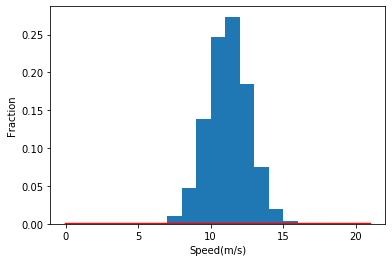

In [ ]:
mu, sigma = 40,5 # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)*0.28
min_value,max_value=np.min(s),np.max(s)
import matplotlib.pyplot as plt
bin=[i for i in range(int(min_value)-5,int(max_value)+5)]
count, bins, ignored = plt.hist(s, bin, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
              np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.ylabel("Fraction")
plt.xlabel("Speed(m/s)")
plt.show()

In [ ]:
max_value

18.201999586234212

#Defining function for writing and reading data from a binary file

In [ ]:
def storeData(db,file_name):
    # Its important to use binary mode
    dbfile = open(file_name, 'wb')
    # source, destination
    pickle.dump(db, dbfile)
    dbfile.close()
def loadData(file_name):
    # for reading also binary mode is important
    dbfile = open(file_name, 'rb')
    db = pickle.load(dbfile)
    dbfile.close()
    return db

#Constructing a Graph in networkx

In [ ]:
location_point=(23.2599, 77.4126)
G_nx=ox.graph_from_point(location_point,dist=1000,network_type="drive")
#osmids = list(G_nx.nodes)
G_ = nx.relabel.convert_node_labels_to_integers(G_nx)
G_proj = ox.project_graph(G_nx)
G_nx = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=5, dead_ends=False)
osmids = list(G_nx.nodes)
G_nx = nx.relabel.convert_node_labels_to_integers(G_nx)
# give each node its original osmid as attribute since we relabeled them
osmid_values = {k: v for k, v in zip(G_nx.nodes, osmids)}
nx.set_node_attributes(G_nx, osmid_values, "osmid")

#Converting graph into igraph format

In [ ]:
%%time
# convert networkx graph to igraph
G_ig = ig.Graph(directed=False)
G_ig.add_vertices(G_nx.nodes)
G_ig.add_edges(G_nx.edges())
G_ig.vs["osmid"] = osmids
weight = "length"
G_ig.es[weight] = list(nx.get_edge_attributes(G_nx, weight).values())
nx.get_edge_attributes(G_nx, weight)

#Retrieving edge length

In [ ]:
length_dict=nx.get_edge_attributes(nx.to_undirected(G_nx),"length")

#Writing single shortest path to a file

In [ ]:
%%time
def calculating_route_length(route,length_dict):
  l=len(route)
  edge_list=[(route[c],route[c+1],0) if route[c]<route[c+1] else (route[c+1],route[c],0) for c in range(l-1)]
  edge_lengths=[length_dict[k] for k in edge_list]
  total_length=sum(edge_lengths)
  return [edge_lengths,total_length]

In [ ]:
%%time
All_pairs_nodes={}
for source in range(nodes-1):
  target_list=[i for i in range(source+1,nodes)]
  path = G_ig.get_shortest_paths(v=source, to=target_list, weights=weight,output='vpath')
  paths=[*path]
  for target,route in zip(target_list,paths):
    All_pairs_nodes[(source,target)]=[route,*calculating_route_length(route,length_dict)]
filename="N_"+str(nodes)+"_E_"+str(Edges)+"DelhiG_shortestpath"
storeData(All_pairs_nodes,filename)

#Distribution of edge length

mean road length= 58.6529665203422 standard deviation of road length= 41.081674171337085
minimum road length= 10.061 maximum road length= 432.986


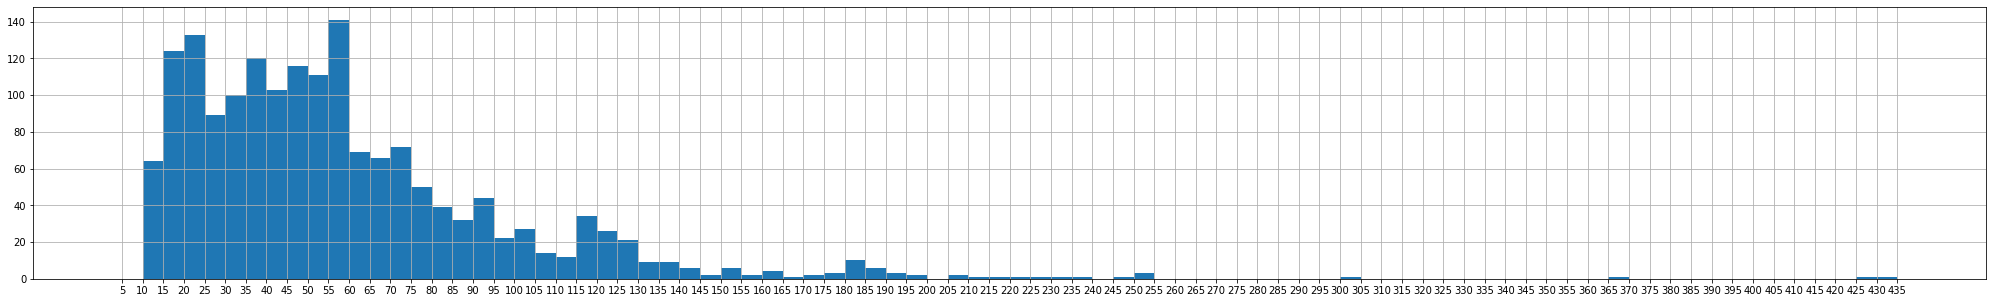

In [ ]:
dist=np.array([length_dict[i] for i in length_dict])
print("mean road length=",np.mean(dist),"standard deviation of road length=",np.std(dist))
min_len,max_len=np.min(dist),np.max(dist)
print("minimum road length=",min_len,"maximum road length=",max_len)
fig=plt.figure(figsize=(35,5))
bin=[i for i in range(5,440,5)]
plt.hist(dist,bins=bin)
plt.xticks(bin)
plt.grid()
#nn,bins,patches=plt.hist(dist,bins=bin,rwidth=0.8,density=True)

#Waiting time distribution


mean time= 5.33151120120407 standard deviation= 3.8492283361315924
minimum time= 0.7270842439174133 maximum time= 40.9418443898324


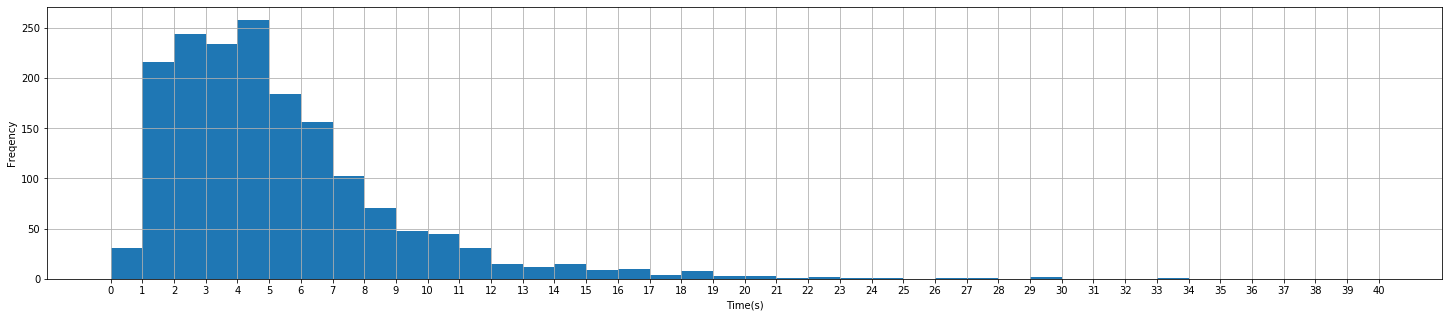

In [ ]:
mu, sigma = 40,5 # mean and standard deviation
s = np.random.normal(mu, sigma, len(dist))*0.28
time_values=dist/s
print("mean time=",np.mean(time_values),"standard deviation=",np.std(time_values))
min_len,max_len=np.min(time_values),np.max(time_values)
print("minimum time=",min_len,"maximum time=",max_len)
fig=plt.figure(figsize=(25,5))
bin=[i for i in range(int(min_len),int(max_len)+1,1)]
plt.hist(time_values,bins=bin)
plt.xticks(bin)
plt.grid()
plt.xlabel("Time(s)")
plt.ylabel("Freqency")
nn,bins,patches=plt.hist(dist,bins=bin,rwidth=0.8,density=True)

#Degree Distribution

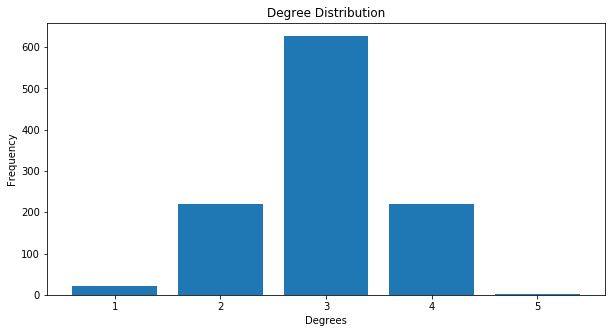

In [ ]:
Nodes_with_Degree=nodes_with_degree_osmnxdata(G_nx)
plotting_degree_distribution(Nodes_with_Degree)

In [ ]:
nodes,Edges=1092,3223

In [ ]:
time_series_each_node=loadData("time_series_each_node_file")

In [ ]:
print(comp_mini_ended_valueforTimeSeries(nodes,time_series_each_node))

9878.6


In [ ]:
Time_series_CTRW_node_dict=Time_series_CTRW_windowtime(5,9875,time_series_each_node,nodes)

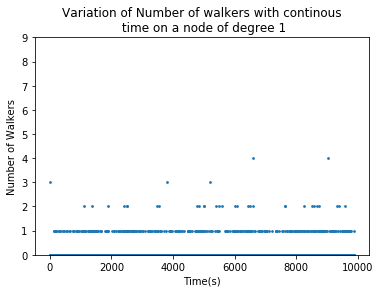

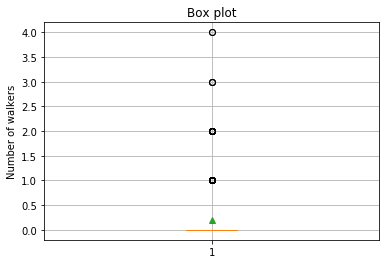

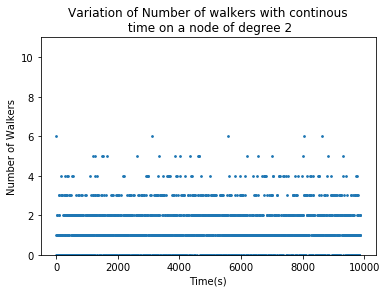

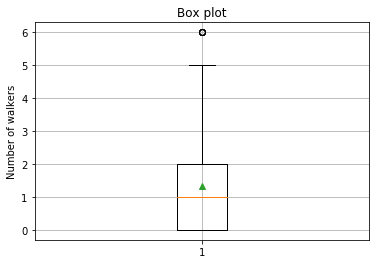

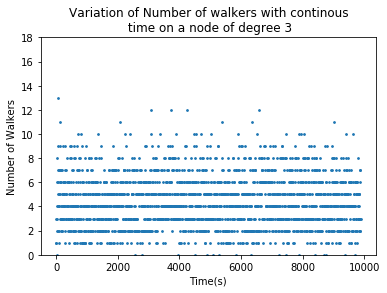

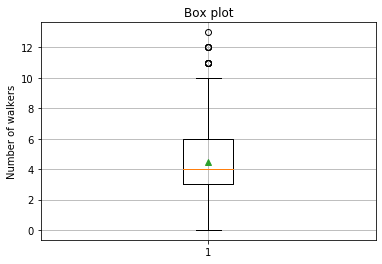

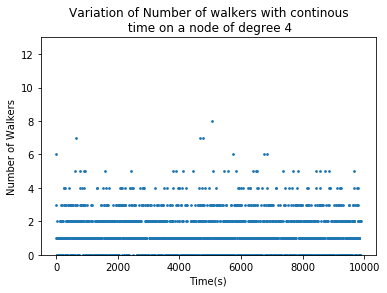

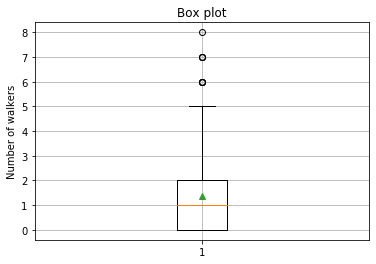

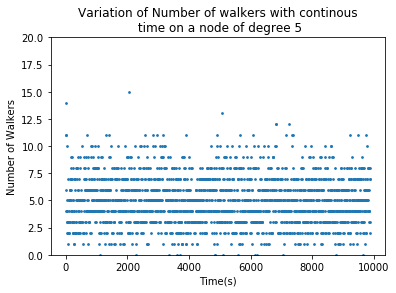

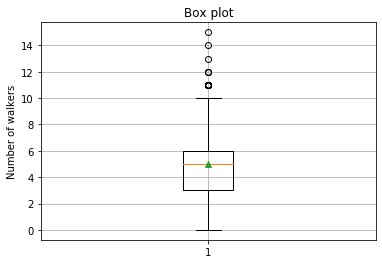

In [ ]:
for i in Nodes_with_Degree:
  plotting_walker_time(i[0],Time_series_CTRW_node_dict,i[1][0])

#Distribution of walkers on a given node

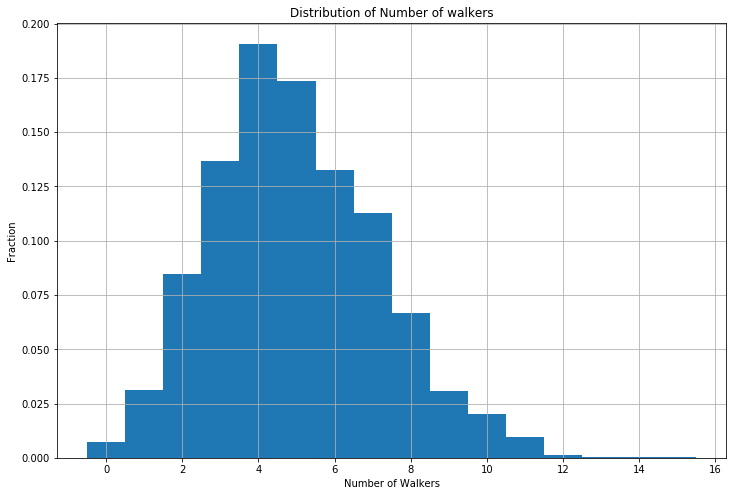

In [ ]:
node=835
array=np.array(Time_series_CTRW_node_dict[node])
walkers_arr=array[::,1]
bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
fsize=(12,8)
align='left'
xlabel,ylabel,title="Number of Walkers","Fraction","Distribution of Number of walkers"
HistoGram(walkers_arr,bins,True,1,xlabel,ylabel,align,title,fsize)

In [ ]:
for i in Nodes_with_Degree:
  array=np.array(Time_series_CTRW_node_dict[i[1][0]])
  walkers_arr=array[::,1]
  bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
  fsize=(12,8)
  align='left'
  xlabel,ylabel,title="Number of Walkers","Fraction","Distribution of Number of walkers"
  HistoGram(walkers_arr,bins,True,1,xlabel,ylabel,align,title,fsize)

#Computing average and standard deviation of walkers for each node

In [ ]:
dic_mean_walkers ,dic_std_walkers=mean_std_walkers_nodewise(Time_series_CTRW_node_dict,nodes)

##Distribution of Average numbers of walkers computed for all nodes

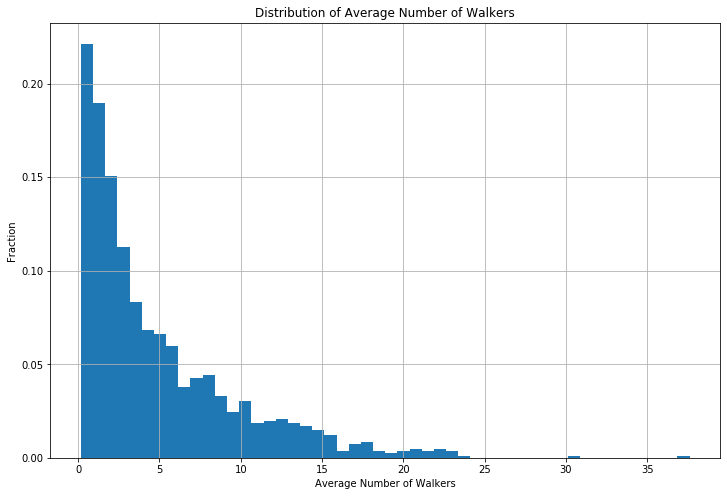

In [ ]:
mean_walkers =np.array([dic_mean_walkers[i] for i in dic_mean_walkers])
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=50
fsize=(12,8)
xlabel,ylabel,title="Average Number of Walkers","Fraction","Distribution of Average Number of Walkers"
HistoGram(mean_walkers ,bins,True,1,xlabel,ylabel,'mid',title,fsize)

##Distribution of Standard deviation of numbers of walkers computed for all nodes

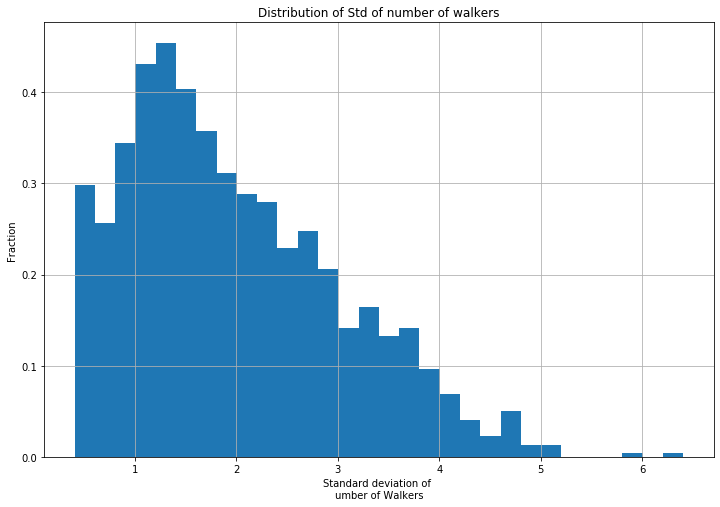

In [ ]:
std_walkers =np.array([dic_std_walkers[i] for i in dic_std_walkers])
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=30
fsize=(12,8)
xlabel,ylabel,title="Standard deviation of \number of Walkers","Fraction","Distribution of Std of number of walkers"
HistoGram(std_walkers,bins,True,1,xlabel,ylabel,'mid',title,fsize)

#Computing average and standard deviation of walkers degreewise

In [ ]:
Average_walk_degreewise,Std_walk_degreewise=walkers_statistic_degreewise(Nodes_with_Degree,dic_mean_walkers,dic_std_walkers)

##Distribution of Average numbers of walkers (Computed degreewise)
Here, I am plotting the distribution of numbers of walkers average over degree of nodes

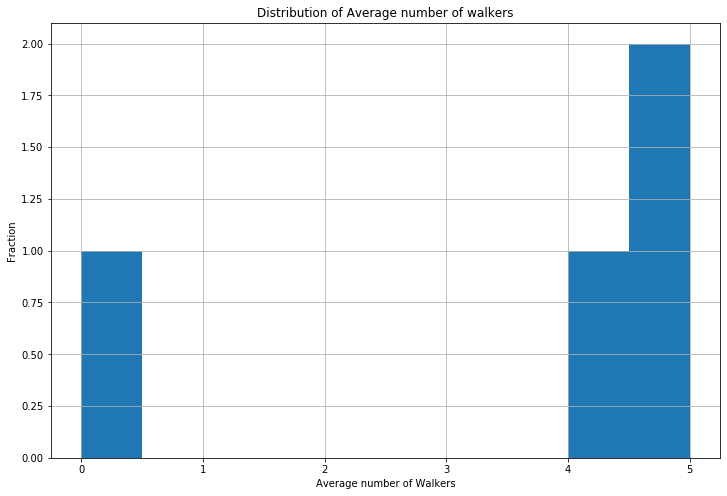

In [ ]:
Avg_walkers =np.array(Average_walk_degreewise)
Avg_walkers_only=Avg_walkers[::,1]
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=[0,0.5 , 1.0,1.5,2.0,3,3.5,4.0,4.5,5.0]
fsize=(12,8)
xlabel,ylabel,title="Average number of Walkers","Fraction","Distribution of Average number of walkers"
HistoGram(Avg_walkers_only,bins,False,1,xlabel,ylabel,'mid',title,fsize)

In [ ]:
Avg_walkers_only

array([0.3215403 , 4.49280964, 4.97939791, 5.62316119, 4.98684211])

##**Variation of average number of walkers with degree of nodes**

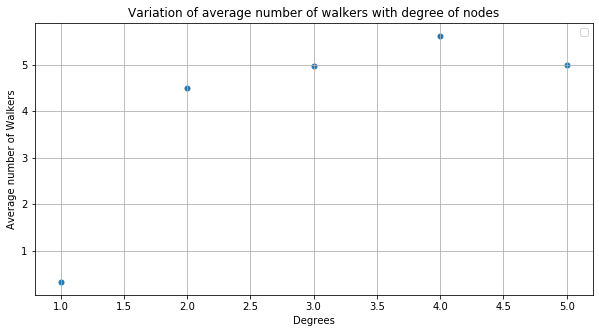

In [ ]:
xarr,yarr=Avg_walkers[::,0],Avg_walkers[::,1]
fig=plt.figure(figsize=(10,5))
xlabel="Degrees"
ylabel="Average number of Walkers"
title="Variation of average number of walkers with degree of nodes"

scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=25,opacity=1,marker="o")

##Distribution of standard deviation of numbers of walkers(computed degreewise)
Here, I am plotting the distribution of numbers of walkers average over degree of nodes.

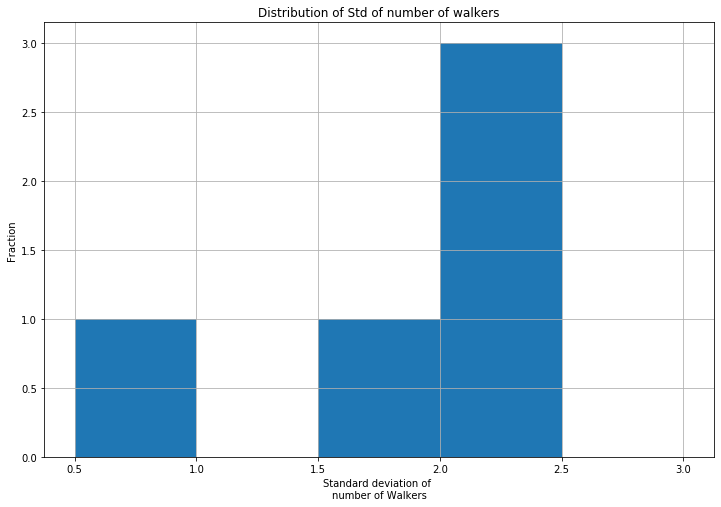

In [ ]:
Std_walkers =np.array(Std_walk_degreewise)
Std_walkers_only=Std_walkers[::,1]
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=[0.5, 1.0,1.5,2.0,2.5,3.0 ]
fsize=(12,8)
xlabel,ylabel,title="Standard deviation of \nnumber of Walkers","Fraction","Distribution of Std of number of walkers"
HistoGram(Std_walkers_only,bins,False,1,xlabel,ylabel,'mid',title,fsize)

In [ ]:
Std_walkers_only

array([0.50964877, 1.85097894, 2.0231038 , 2.18592376, 2.21510936])

##**Variation of Std of number of walkers with degree of nodes**

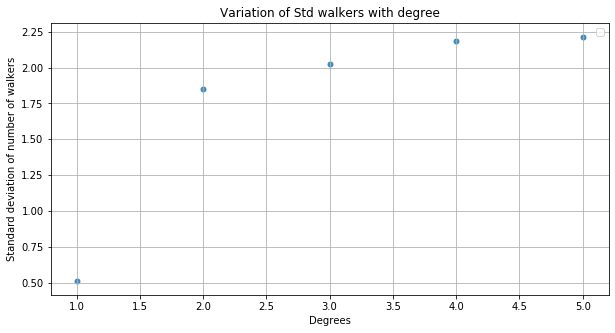

In [ ]:
xarr,yarr=Std_walkers[::,0],Std_walkers[::,1]
fig=plt.figure(figsize=(10,5))
xlabel="Degrees"
ylabel="Standard deviation of number of walkers"
title="Variation of Std walkers with degree"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=25,opacity=0.8,marker="o")

##**Variation of Average number of walkers with standard deviation**

scaling= 0.48794464893390765 exponent= 0.7947132498784246 shifting= 0.3108691392998354


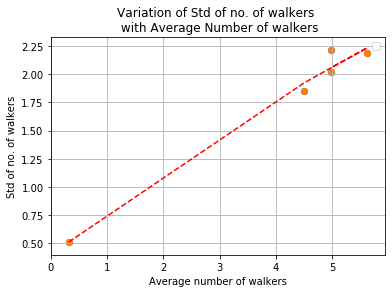

In [ ]:
xarr=Avg_walkers_only
yarr=Std_walkers_only
xlabel,ylabel,title="Average number of walkers","Std of no. of walkers","Variation of Std of no. of walkers \n with Average Number of walkers"
labels="Variation"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=40,opacity=0.8,marker="o")
curve_fitting(xarr,yarr)

#Extreme Event Probablity Computation and plotting

In [ ]:
Scaling_factor=2
threshold,EEP_nodewise,EEP_degreewise=ExtremeEventProb(nodes,Nodes_with_Degree,Scaling_factor,Time_series_CTRW_node_dict,dic_mean_walkers,dic_std_walkers)

##Distribution of threshold values computed for all nodes

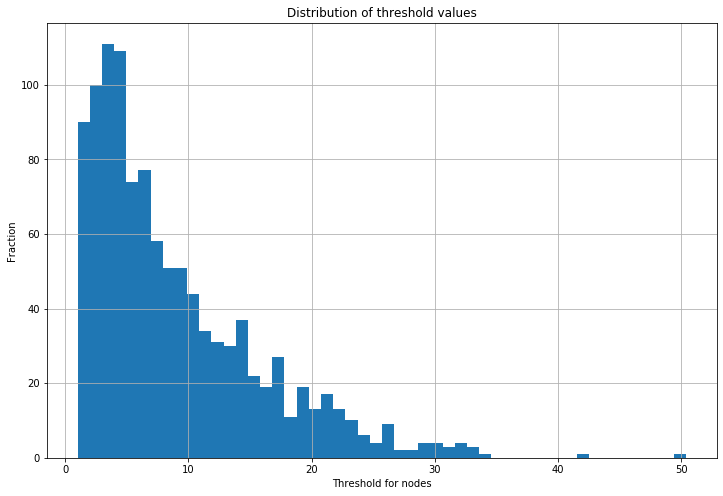

In [ ]:
threshold_values=np.array([threshold[i] for i in threshold])
bins=50
xlabel,ylabel,title="Threshold for nodes","Fraction","Distribution of threshold values"
HistoGram(threshold_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##Distribution of Probability of Extreme event values(computed for all nodes)

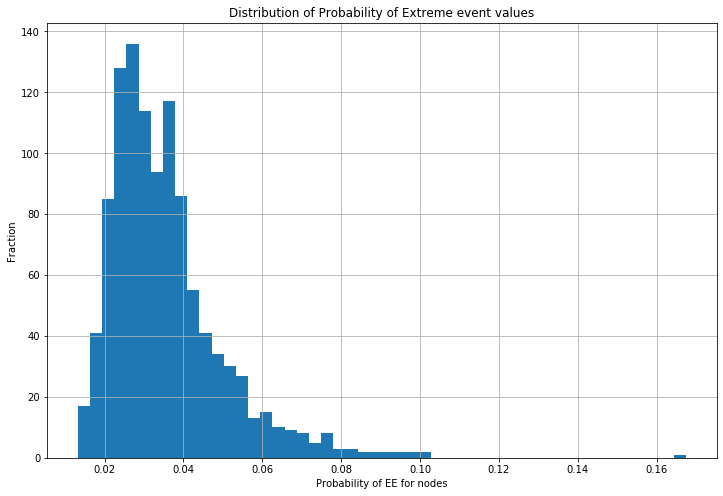

In [ ]:
ExtremeEventN_values=np.array([EEP_nodewise[i] for i in EEP_nodewise])
bins=50
xlabel,ylabel,title="Probability of EE for nodes","Fraction","Distribution of Probability of Extreme event values"
HistoGram(ExtremeEventN_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##Distribution of Probability of Extreme event values average over nodes of same degree

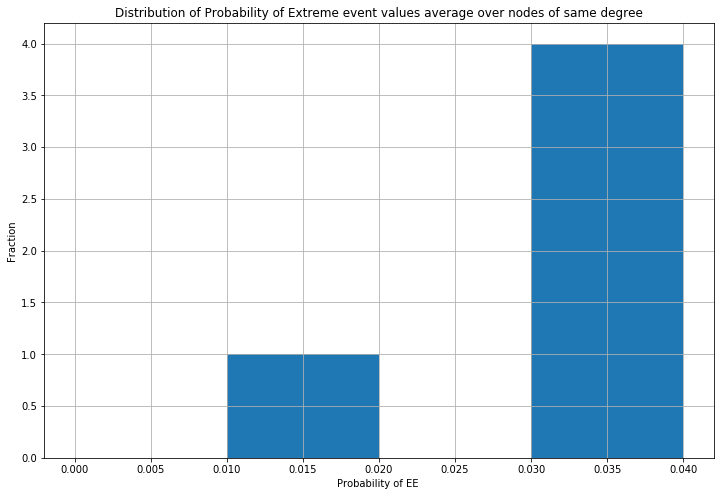

In [ ]:
ExtremeEventD_values=np.array([EEP_degreewise[i] for i in EEP_degreewise])
bins=[0.0 , 0.01, 0.02, 0.03, 0.04]
xlabel,ylabel,title="Probability of EE ","Fraction","Distribution of Probability of Extreme event values average over nodes of same degree"
HistoGram(ExtremeEventD_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

In [ ]:
ExtremeEventD_values

array([0.0180346 , 0.03611437, 0.03616686, 0.03491445, 0.03289474])

##Variation of Probability of Occurrence of extreme event with degree of nodes

Text(0.5, 0, 'Degrees')

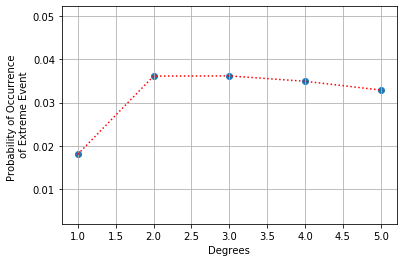

In [ ]:
extreme_eventP_degreewise=np.array([[j,EEP_degreewise[j]] for j in EEP_degreewise])
xarr,yarr=extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1]
plt.scatter(extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1])
plt.plot(extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1],color='r',ls=':')
plt.ylabel("Probability of Occurrence \n of Extreme Event")
plt.grid()
plt.xlabel("Degrees")

#Variation of Extreme event probability curve with Window Time

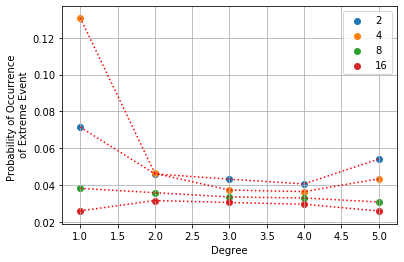

In [ ]:
for i in [2,4,8,16]:
  Time_series_CTRW_node_dict_=Time_series_CTRW_windowtime(i,9872,time_series_each_node,nodes)
  dic_mean_walkers_ ,dic_std_walkers_=mean_std_walkers_nodewise(Time_series_CTRW_node_dict_,nodes)
  Scaling_factor=2
  threshold,EEP_nodewise,EEP_degreewise=ExtremeEventProb(nodes,Nodes_with_Degree,Scaling_factor,Time_series_CTRW_node_dict,dic_mean_walkers_,dic_std_walkers_)
  extreme_eventP_degreewise=np.array([[j,EEP_degreewise[j]] for j in EEP_degreewise])
  xarr,yarr=extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1]
  plt.scatter(xarr,yarr,label=str(i)+"s")
  plt.plot(xarr,yarr,color='r',ls=':')
plt.ylabel("Probability of Occurrence \n of Extreme Event")
plt.grid()
plt.xlabel("Degree")
plt.legend()

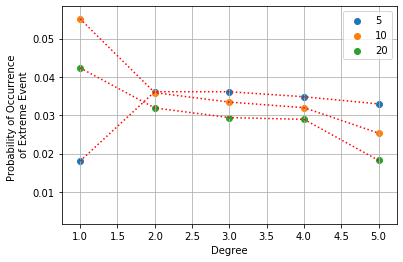

In [ ]:
for i in [5,10,20]:
  Time_series_CTRW_node_dict_=Time_series_CTRW_windowtime(i,9860,time_series_each_node,nodes)
  dic_mean_walkers_ ,dic_std_walkers_=mean_std_walkers_nodewise(Time_series_CTRW_node_dict_,nodes)
  Scaling_factor=2
  threshold_,EEP_nodewise_,EEP_degreewise_=ExtremeEventProb(nodes,Nodes_with_Degree,Scaling_factor,Time_series_CTRW_node_dict_,dic_mean_walkers_,dic_std_walkers_)
  extreme_eventP_degreewise_=np.array([[j,EEP_degreewise_[j]] for j in EEP_degreewise_])
  xarr,yarr=extreme_eventP_degreewise_[::,0],extreme_eventP_degreewise_[::,1]
  plt.scatter(xarr,yarr,label=str(i))
  plt.plot(xarr,yarr,color='r',ls=':')
plt.ylabel("Probability of Occurrence \n of Extreme Event")
plt.grid()
plt.xlabel("Degree")
plt.legend()